## Part A
### Q1) Hash Tables

#### Draw the 11-entry hash table that results from using the hash function:
    h (i) = (3i+5) mod 11
   

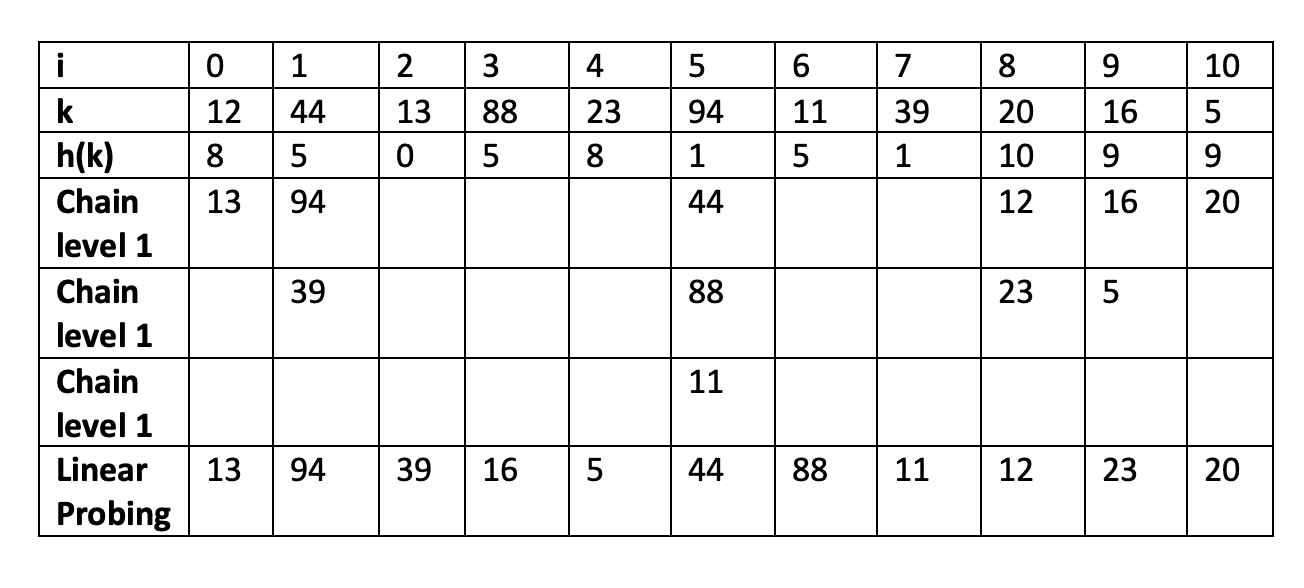

#### Explain and discuss some differences between circular chaining and linear probing:

Before explaining the differences between circular chaining and linear probing, we will first introduce hash tables. 

A hash table is a data structure that stores data in an associative manner, where keys are mapped to values. The data in a hash table is stored in an array type and each data value has its own unique index value. A hash function (such as the one used above) is used to convert a range of key values into a range of indexes of an array. This creates a table which has a search time of O(1).

Circular chaining and linear probing are both ways of dealing with collisions in hash tables. Collisions occur when keys are not all mapped to unique integers. As a result, some keys must be stored in the same index of the hash table. We will now compare cicular chaining and linear probing: 

**Circular Chaining:**
- With cicular chaining, each cell of a hash table points to a linked list of elements that have the same hash function values. 
- It is easy to implement and the hash table never fills up as we can keep adding elements to each of the linked lists. 
- It is good to use when it is not known in advance how many keys will be inserted or deleted. 
- The cache performance is not as good as with linear probing as the keys are stored in separate linked lists. With linear probing, the keys are all stored in the same table. 
- The time complexity of search, insert and delete are O(1).
- If the chain becomes long, then search time can become O(n) in the worst case. 
- Deletions will be easier to perform than linear probing. 
- There is a wastage of space as some parts of the hash table are never used. 



**Linear Probing:**
- Linear probing is a form of open addressing.
- It involves linearly searching the hash table until an empty slot is found. When an empty slot is found, the key is then added.
- In comparison to circular chaining which works well when the number of keys to be inserted is unknown, with linear probing the size of the table must be greater than or equal to the number of keys. In other words, linear probing is used when the number of keys is known.
- In comparison to cicular chaining, deletion with linear probing is more complicated. The table needs to be rehashed. Furthermore, slots of deleted cells must are marked as "deleted" to facilitate the insert and search functions. 
- An issue that occurs with linear probing, but not with circular chaining is clustering. This occurs when many consecutive elements form groups and thus more linear probing is needed to find a slot or search an element. 
- There is no wastage of space as a slot can be used even if an input doesn't map to it. 
- In terms of complexity, linear probing will also generally be O(1) for lookups. Linear probing will handle insertions easier than circular chaining as memory does not need to allocated for another link in the chain. 


### Q2) Undirected Graphs
 
a) We will now attach a screenshot of G, the graph generated from Table 1. 

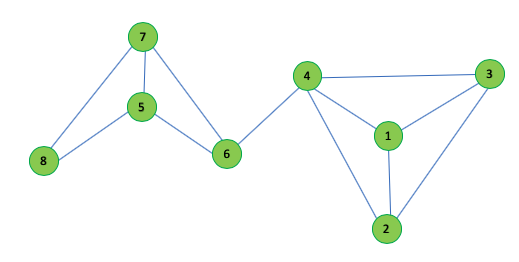

We will now perform a depth first search (DFS) followed by a breadth first search (BFS) on G. Rather than just list the sequences obtained, we will briefly decribe the steps being taken in order to obtain the sequences. As per the assignment, we will then define DFS and BFS and discuss the sequences obtained. 

#### b) Sequence of vertices of G visited using a DFS traversal starting at vertex 1:

For ease of understanding, I will present each step of the route as a pair, with the first element in the pair representing the vertex we are moving from, and the second element representing the vertex being travelled to. This is similar to the way that ```networkx``` outputs the results as seen in Lab 7.

**The steps of the sequence are:**
- We begin at vertex 1. Adjacent to 1 are 2,3 and 4. We will choose 2. (1,2) 
- Adjacent to 2 are 1,2,3. We are only interested in unvisited nodes. We will choose 3. (2,3)
- The only unvisited node adjacent to 3 is 4. Thus, the next step is (3,4).
- The only unvisited node adjacent to 4 is 6. Thus, we move from 4 to 6. (4,6)
- 6 is adjacent to both 5 and 7 and both are unvisited. As a result we can choose either. We choose to move from 6 to 5. (6,5)
- 5 is adjacent to 6,7,8. Only 7 and 8 are unvisited. We choose 7. (5,7)
- From 7 the only unvisited node is 8. (7,8)

**Summary of steps taken:**
(1,2),(2,3),(3,4),(4,6),(6,5),(5,7),(7,8)

**Overall sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

#### c) Sequence of vertices of G visited using a BFS traversal starting at vertex 1:

- We start at 1. 
- The nodes adjacent to 1 are 2,3,4 so we visit all 3.
- 6 is adjacent to these nodes so we visit 6.
- 5, 7 are adjacent to these nodes so we visit them next. 
- 8 is the only unvisited node adjacent to the visited nodes. 

**The steps of the sequence are:**
(1,2)(1,3)(1,4)(4,6)(6,5)(6,7)(7,8)


**Sequence obtained:** 1, 2, 3, 4, 6, 5, 7, 8

## TODO

#### Discuss the terms DFS and BFS in your own words briefly and discuss your observations about the obtained sequences. 

https://www.tutorialspoint.com/data_structures_algorithms/depth_first_traversal.htm

## Part B:
### Q1 Sorting Algorithms:




- In the cells below we will execute bubble, quick and merge sort algorithms. As instructed, we will use the code provided in lab 6. 
- We will compute the running time of each algorithm to sort an input list A with x integer elements. 
- The input list A will initially be sorted in reverse order. Each of the sorting algorithms will then sort this list in ascending order. 
- Using different values for x, we will then plot the running time as a function of x for each algorithm. 
- For ease of understanding, we will give a brief introduction to each sorting algorithm before providing the code. A more in depth discussion will be provided after computing the running times. 

In [1]:
from time import perf_counter
import matplotlib.pyplot as plt

**Bubble sort**
Bubble sort repeatedly steps through the list and repeatedly swaps adjacent elements if they are in the wrong order. This is repeated until the list is sorted. 

In [2]:
#code from lab 7
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

**Quick sort**
Quick sort uses a divide and conquer technique to sort a list. It consists of the following steps:
- **Divide (also referred to as partition):** A specific element is chosen from the list A known as the pivot. All elements are removed from A and added to three sub-arrays: 
    - 1: stores the elements in A which are less than the pivot.
    - 2: stores the elements in A which are equal to the pivot. 
    - 3: stores the elemnts in A which are greater than the pivot.
- **Conquer:** Recursively sort the arrays 1 and 3.
- **Combine:** Join 1,2,3 back together in that specific order.

In [3]:
#code from lab 7
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)

In [4]:
arr = [5,4,3,2,1]
quicksort(arr)

In [5]:
arr

[1, 2, 3, 4, 5]

Like quicksort, merge sort also uses the divide and conquer technique. In the ```mergesort``` algorithm, two sorted arrays are merged together. 

**Merge:**
Given two arrays *A1* and *A2*, the aim is to combine them into a single sorted array *A*. The ```merge``` algorithm consists of the following steps:
- Compare the first element of *A1* to the first element of *A2*.
- Take the smaller of the two values and remove it from its array. 
- Append the value to *A*.
These steps are repeatedly performed until either *A1* or *A2* is empty. 

**Mergesort:**
The merge algorithm just described is used in the mergesort algorithm. The following steps are taken in mergesort: 
- **Divide:** Split A into two arrays, each containing half of the elements of A. If the length of A is less than 2, the array is already sorted. 
- **Conquer:** Recursively sort the two arrays.
- **Combine:** Merge the sorted arrays back into A. 

In [6]:
#code from lab 7
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

Before proceeding with timing the functions, we will first make sure that the code for each algorithm is correctly sorting an array. 

In [7]:
# code adapted from lab 6
import unittest

class SortingAlgorithmTest(unittest.TestCase):
    def __init__(self, *args, **kwargs):
        super(SortingAlgorithmTest, self).__init__(*args, **kwargs)
        self.test_arr = [[1], [1, 2], [2, 1], [5, 2, 7, 1, 8], [1, 2, 5, 7, 8],
                [10, 272, 100, -98, 876, 877754, 98124, 0, 1000000, -100]]
  
    def test_bubblesort(self):
        '''test bubble sort'''
        for arr in self.test_arr:
            self.assertEqual(sorted(arr), bubble_sort(arr))
        
    def test_quicksort(self):
        for arr in self.test_arr:
            quicksort(arr)
            self.assertEqual(sorted(arr), arr)
        
    def test_mergesort(self):
        for arr in self.test_arr:
            self.assertEqual(sorted(arr), mergesort(arr))
                          
unittest.main(argv=[''], verbosity=2, exit=False)

test_bubblesort (__main__.SortingAlgorithmTest)
test bubble sort ... ok
test_mergesort (__main__.SortingAlgorithmTest) ... ok
test_quicksort (__main__.SortingAlgorithmTest) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


We can see that all three algorithm are successfully sorting an array which is initially in reverse order. We can now proceed with timing the algorithms. 

We will begin by creating a function ```create_array()``` which takes ```length``` as an argument and creates an array of length ```length``` which sorted in descending order. As specified in the assignment, the array created will range from ```length-1``` to ```0```.

In [8]:
def create_array(length):
    '''create an array sorted in descending order'''
    values = []
    for i in range(length-1, -1, -1):
        values.append(i)
    return values

Next, we will check that this array is indeed printing out an array which is sorted in reverse order. 

In [9]:
#test that create_array function is returning an array in reversed order
print(create_array(5))

[4, 3, 2, 1, 0]


The next step is to create a function called ```time_sorting_algorithm```. 
- It takes a specific sorting algorithm as an argument.
- The function iterates through different values ranging from 1 to 1000 in steps of 10 in order to create arrays of different sizes using the ```create_array()``` method defined above. 
- Each of these different sized arrays is then given as an argument to the sorting algorithm. 
- This function then times how long it takes the sorting algorithm to sort each array. The time taken is added to a dictionary ```results``` with the size of the array being the key. 
- Thus, each sorting algorithm will end up with its own dictionary of results. 

In [10]:
def time_sorting_algorithm(algorithm):
    '''measure the time taken to sort arrays of different size using different sorting algorithms.
    
    results are stored in a dictionary.'''
    results = {}
    for i in range(1, 2000, 10):
        values = create_array(i)
        t1_start = perf_counter()
        algorithm(values)
        t1_stop = perf_counter()
        results[i] = t1_stop-t1_start
    return results

Next, we create another dictionary called ```sorted_algorithms```. The keys in this dictionary are the names of the different sorting algorithms. The value for each key is the dictionary defined in ```time_sorting_algorithm``` above.

In [11]:
#create a new empty dictionary
sorting_algorithms = {}

In [12]:
#call the time_sorting_algorithm function and create a dictionary of bubble sort results
sorting_algorithms['bubble_sort'] = time_sorting_algorithm(bubble_sort)

In [13]:
#call the time_sorting_algorithm function and create a dictionary of quicksort results
sorting_algorithms['quick_sort'] = time_sorting_algorithm(quicksort)

In [14]:
#call the time_sorting_algorithm function and create a dictionary of merge sort results
sorting_algorithms['merge_sort'] = time_sorting_algorithm(mergesort)

Next, we plot the running times as a function of the array size for each sorting algorithm. For ease of understanding, we first plot each algorithm individually and then plot all together.

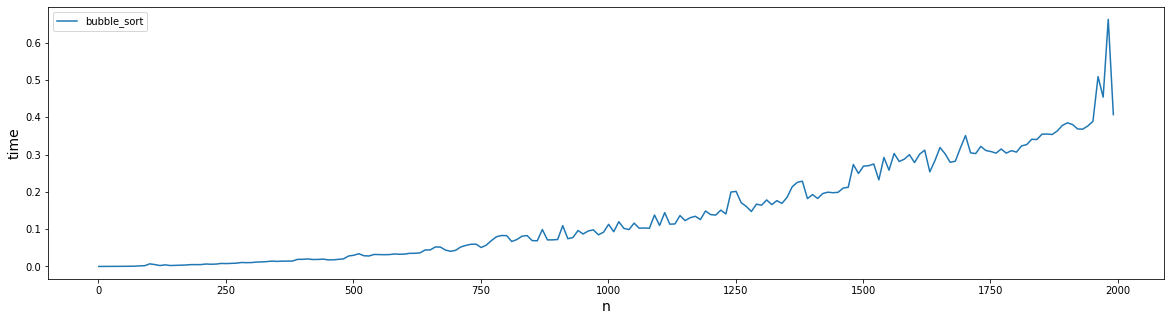

<Figure size 432x288 with 0 Axes>

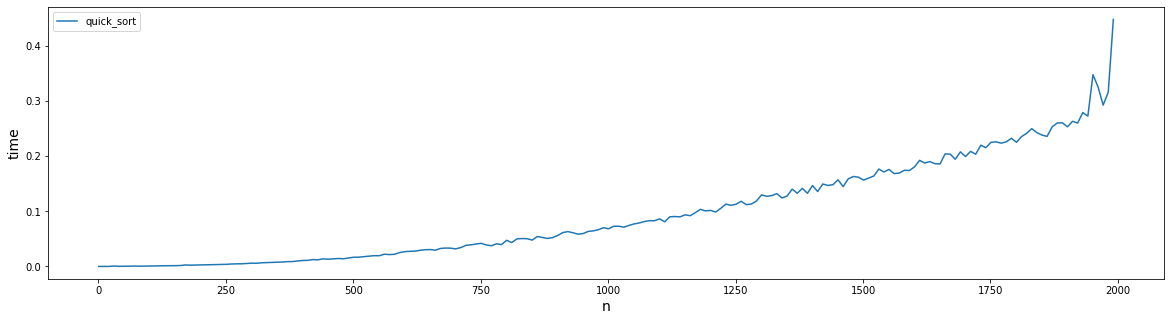

<Figure size 432x288 with 0 Axes>

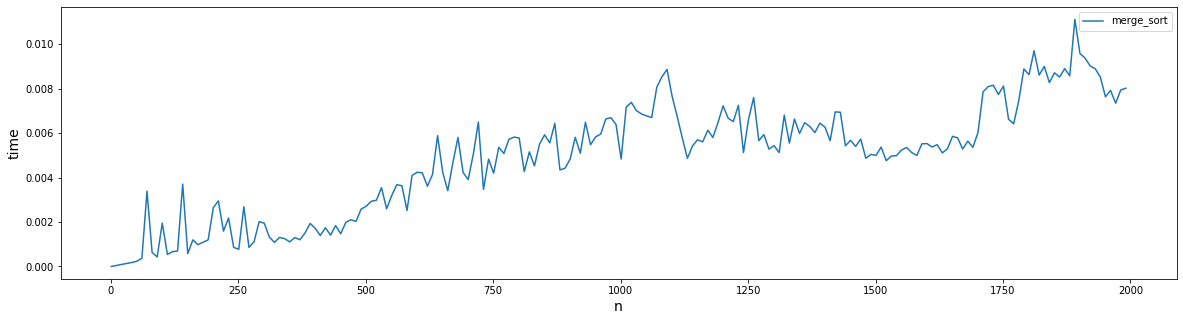

<Figure size 432x288 with 0 Axes>

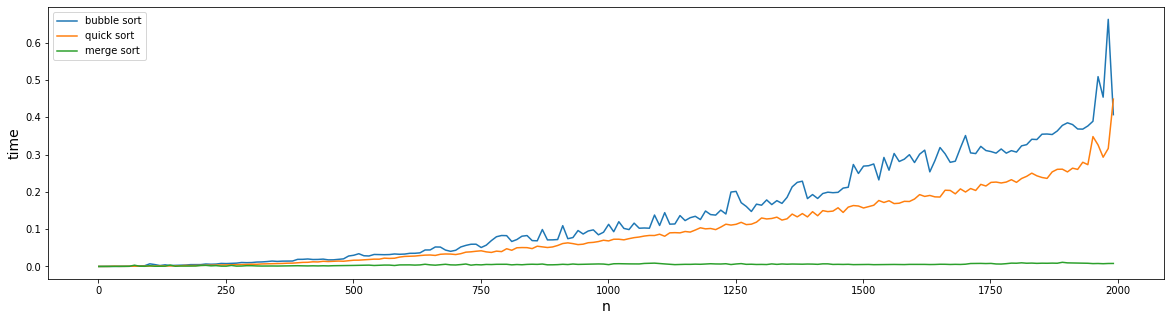

<Figure size 432x288 with 0 Axes>

In [15]:
#s is key of the dict
for algorithm in sorting_algorithms:
    
    # create a variable containing the dictionary of running times for each size of array
    dict_of_time_results = sorting_algorithms[algorithm]

    # l1 is a list of the keys which are the different sizes of the array
    l1 = list(dict_of_time_results.keys())
    #l2 is a list of runnning times for each size array
    l2 = [dict_of_time_results[size] for size in dict_of_time_results]

    plt.figure(figsize=(20,5))
    #index the list. l[0] is n and l[1] is the running times
    plt.plot(l1,l2, label = algorithm)
    #add labels 
    plt.xlabel('n',fontsize =14)
    plt.ylabel('time',fontsize =14)
    #show legend
    plt.legend()
    #show plot
    plt.show()
    plt.savefig( algorithm + '.png')


x = list(sorting_algorithms['bubble_sort'].keys())  
bubblesort_times = [sorting_algorithms['bubble_sort'][time] for time in sorting_algorithms['bubble_sort']]
quicksort_times = [sorting_algorithms['quick_sort'][time] for time in sorting_algorithms['quick_sort']]
mergesort_times = [sorting_algorithms['merge_sort'][time] for time in sorting_algorithms['merge_sort']]
    
    

plt.figure(figsize=(20,5))
#plot functions
plt.plot(x, bubblesort_times, label = 'bubble sort')
plt.plot(x, quicksort_times, label = 'quick sort')
plt.plot(x, mergesort_times, label = 'merge sort')
#add labels 
plt.xlabel('n',fontsize =14)
plt.ylabel('time',fontsize =14)
# #show legend
plt.legend()
# #show plot
plt.show()
plt.savefig('all_algorithms.png')

#### Discussion of results: 

- At first inspection, we can see that merge sort performs better than bubble sort and quick sort. We will now discuss each algorithm in terms of time complexity and initial distribution of input data.

**Bubble sort:** 
Bubble sort compares each element in an array one by one and sorts them based on their values. This algorithm will start by comparing the first element of the array with second. If the firest element is greater than the second, it will swap the two elements. It will then move on to compare the second and third elements and so on to the end of the array. 

The worst case for bubble sort is if the smallest element is in the last position of the array. This means that for an array of n elements, the swapping process will need to be repeated n-1 times in order to move the smallest element to the front of the array. Based on the number of comparisons this takes, the time complexity is *O(n^2)*.

The input given to bubble sort above was sorted in reverse order and thus the time complexity in our case is *O(n^2)* as seen in the curve above. 

**quick sort:**


**merge sort:**
To determine the time complexity of ```merge_sort``` will first discuss the time complexity of ```merge```. We can in above that each iteration of merge does one comparison and puts one value into the ```result``` list. A number is only considered once and thus each number in the two arrays ```left``` and ```right``` gets one operation. This gives a running time of *O(n1 + n2)* for the ```merge``` algorithm. 

As mentioned above, the divide section of merge-sort splits the array into two arrays at each iteration, resulting overall in a tree-like structure, with each node(array) being split into two until the base case is reached. With an array of length n, this tree will have *O(logn)* layers. Each node in the tree has one merge operation associated with it which as discussed, takes *O(n1 + n2)* time. This the whole ```merge_sort``` algorithm runs in O(nlogn) time. This is seen in the graph above. The input given to the algorithm in reversed order does not change the time complexity, as merge-sort always divides the arrays into two halves.  

## 2) a. Dijkstra's algorithm

In this question, we will exploring dijkstra's algorithm. Dijkstra's algorithm is used to compute the shortest path from a starting node to a target node in a weighted graph. A weighted graph is one in which the edges have weights or values. Dijkstra's algorithm is applied many real-world applications such as maps and IP routing.

In the images below, we will step through Dijkstra's algorithm. Briefly, the steps are as follows:
- To begin with, we have set all nodes as white. The weights for each edge are written in black beside each edge. 
- We start at A and aim for G as the end. We start by colouring A orange to show that it has been visited. 
- We mark the distance to vertex A as 0 and all other vertices as ∞.
- We then calculate the total distance to each unvisited neighbour from the current vertex. In the graphs, we colour all neighbours yellow to show which are being considered. 
- Next, we update the neighbouring nodes distances if they are smaller than their current value. 
- We then choose the vertex with the lowest marked distance and select it as the current vertex. We change the colour of this vertex to orange to mark it as visited. 
- For ease of understanding, underneath each graph is a list of the nodes which have been visited. 


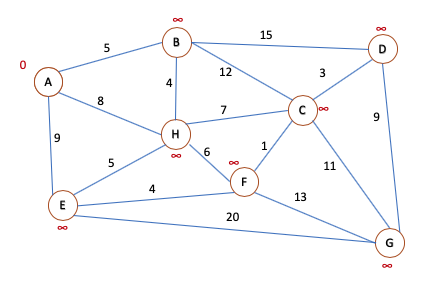

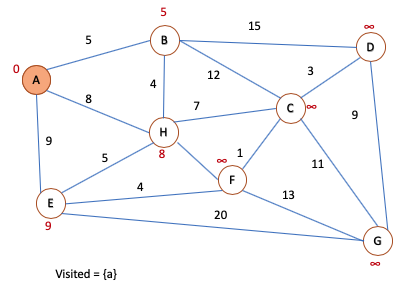

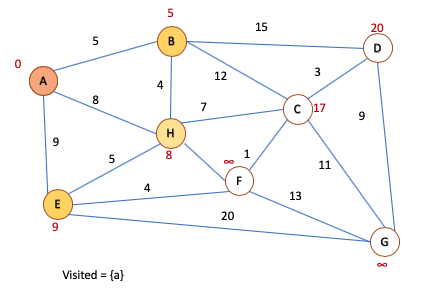

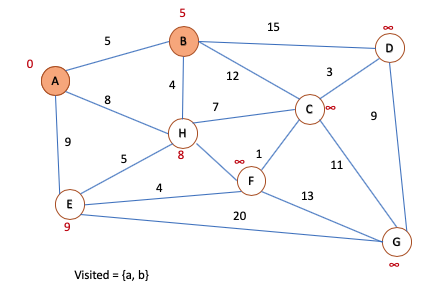

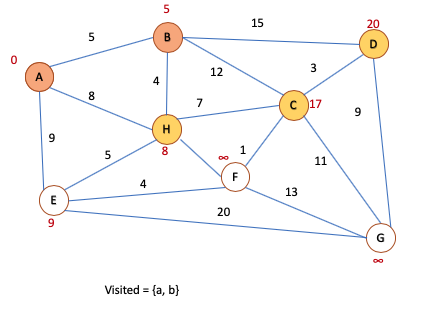

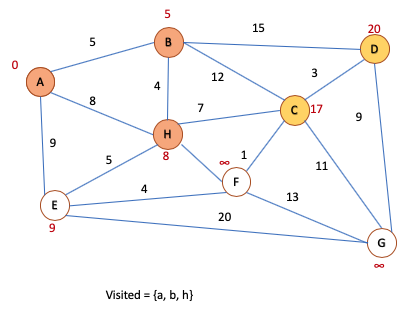

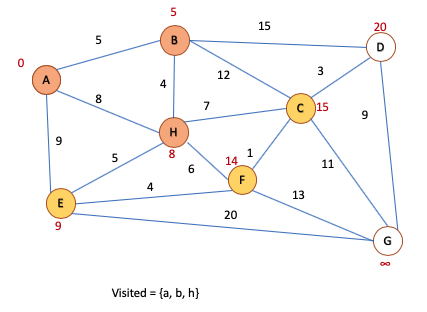

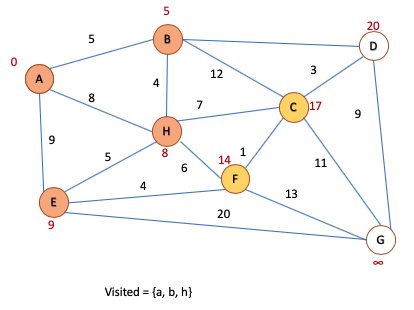

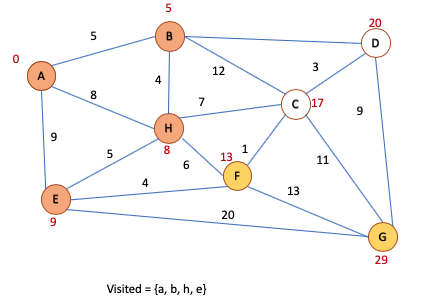

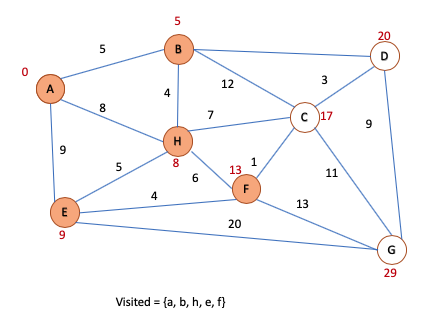

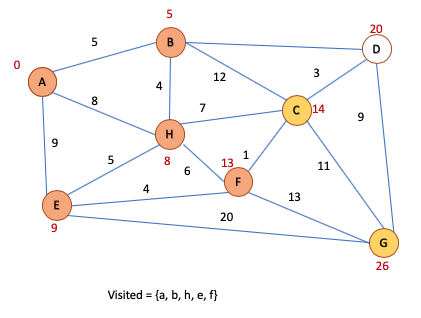

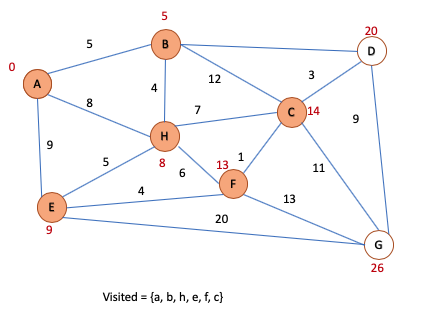

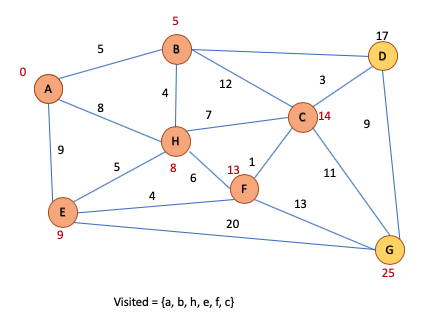

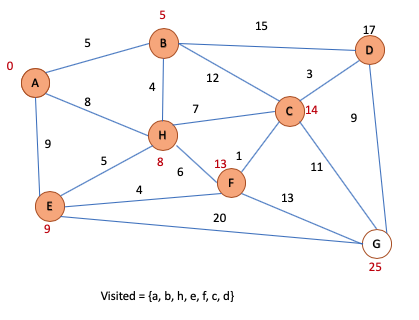

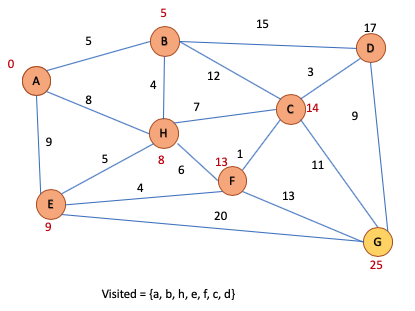

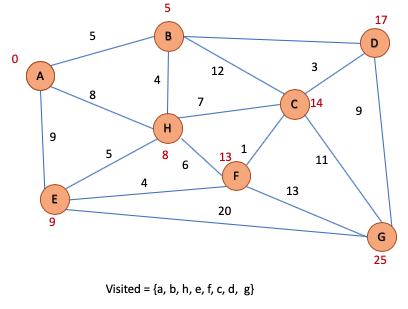

We will now verify the answer obtained in the graphs above using the ```networkx``` Python package. ```networkz``` is a library used to study graphs and networks. 

#### b) i. Create an empty weighted graph.

We will begin by creating a new weighted graph called G. As mentioned earlier, a weighted graph is one whose edges have weights. These weights can represent the cost or distance to travel from one node to another. 

We will begin by importing the necessary packages.

In [16]:
import networkx as nx
from networkx.algorithms import tree

In [18]:
#### i. Create an empty weighted graph.
G = nx.Graph()

#### ii. Add vertices (nodes) with their weights given in figure 1 to G.

- Next we will iterate through each of the nodes in G and add each to the graph using the  ```add_node()``` method. 
- The next step is then to add the edges to the graph. To do this we have created a dictionary of nodes. 
- The keys of the dictionary are each of the nodes excluding the last. The value for each key is an array of arrays. Within each nested array is a node and an integer value. The node represents a neighbour of the node which is the key and the integer value denotes the weight of the edge to that neighbouring node. 
- We then iterate through the dictionary and for each node we use the ```add_edge()``` method within the ```networkx``` library. 
- We have printed information regarding the graph below for ease of understanding and to ensure that our nodes and edges were correctly added. 

In [19]:
for node in ['a','b','c','d','e','f','g','h']:
    G.add_node(node)


nodes_dict = {
    'a':[['b',5], ['e',9], ['h',8]],
    'b': [['h',4], ['c',12], ['d',15]],
    'c': [['d',3], ['f',1], ['g',11], ['h',7]],
    'd': [['g',9]],
    'e': [['h',5], ['f',4], ['g',20]],
    'f': [['g',13]],  
}

for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G.add_edge(node, edge[0], weight = edge[1])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 15
Average degree:   3.7500


#### iii. Draw G

## TODO - fix coordinates so it looks like assignment graph

/Users/hannahbarrett/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


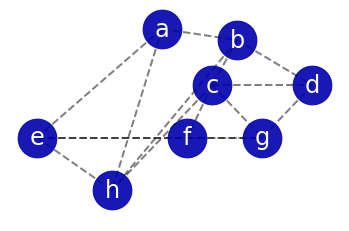

In [20]:
# pos = nx.spring_layout(G) # for a random layout
pos= {'a': [-.2, .7], 'b': [.1,  .4], 'c': [0,-.8], 'd': [0.4, -0.8], 'e': [-.7, -2.2], 'f': [-.1, -2.2], 'g': [.2,-2.2], 'h': [ -.4, -3.6], 'i': [ .7, -2.4], 'j': [.8, .7]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

#### iv. Compute all shortest paths and distances between vertex A and all other reachable vertices in the graph using Dijkstra's algorithm. For each vertex, print a list that contains its shortest path with the minimum distance. 

In order to compute all shortest paths and distances between vertex A and all other reachable vertices, we will use the ```single_source_dijkstra()``` as described at https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html/.

This method will returns a tuple of two dictionaries - ```length``` and ```path```. The dictionaries are keyed by node. ```length``` contains the shortest distance to each node from the source ```a```. ```path``` contains the path from the source ```a``` to that node. 

For ease of understanding, we will first print ```length``` and ```path``` as they are returned. 

In [21]:
length, path = nx.single_source_dijkstra(G, 'a')
length, path

({'a': 0, 'b': 5, 'h': 8, 'e': 9, 'f': 13, 'c': 14, 'd': 17, 'g': 25},
 {'a': ['a'],
  'b': ['a', 'b'],
  'e': ['a', 'e'],
  'h': ['a', 'h'],
  'c': ['a', 'e', 'f', 'c'],
  'd': ['a', 'e', 'f', 'c', 'd'],
  'f': ['a', 'e', 'f'],
  'g': ['a', 'e', 'f', 'c', 'g']})

Next, as required, we will now print a list for each vertex that contains its shortest path with the minimum distance. To do this we will iterate through the dictionary ```path``` and for each node we will display the path and the length. The path will be displayed as a list with each element in the list being the next hop. 

In [22]:
for node in path:
    print(f"Path to {node}:")
    print(f"Path: {path[node]} Length:{length[node]}")
    print()

Path to a:
Path: ['a'] Length:0

Path to b:
Path: ['a', 'b'] Length:5

Path to e:
Path: ['a', 'e'] Length:9

Path to h:
Path: ['a', 'h'] Length:8

Path to c:
Path: ['a', 'e', 'f', 'c'] Length:14

Path to d:
Path: ['a', 'e', 'f', 'c', 'd'] Length:17

Path to f:
Path: ['a', 'e', 'f'] Length:13

Path to g:
Path: ['a', 'e', 'f', 'c', 'g'] Length:25



We can see that the shortest paths and distances to each node are the same as those calculated in our graphs above. 

#### v. Draw a graph of shortest path tree.

We will now draw the graph of the shortest path tree. We will include only the nodes and distances included in the output from dijkstra's algorithm above. To do this we will again iterate through the nodes and add all to G using the  ```add_node()``` method. We will then add the edges and weights which are part of the shortest path tree using ```add_edge()```.

In [23]:
G_shortest_path = nx.Graph()

for node in ['a','b','c','d','e','f','g','h']:
    G_shortest_path.add_node(node)


nodes_dict = {
    'a':[['b',5], ['e',9], ['h',8]],
    'c': [['d',3], ['g',11]],
    'e': [['f',4]],
    'f': [['g',13],['c',1]]
}

for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G_shortest_path.add_edge(node, edge[0], weight = edge[1])

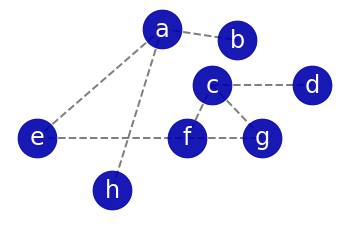

In [24]:
# pos = nx.spring_layout(G) # for a random layout
pos= {'a': [-.2, .7], 'b': [.1,  .4], 'c': [0,-.8], 'd': [0.4, -0.8], 'e': [-.7, -2.2], 'f': [-.1, -2.2], 'g': [.2,-2.2], 'h': [ -.4, -3.6], 'i': [ .7, -2.4], 'j': [.8, .7]}
nx.draw_networkx_nodes(G_shortest_path, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G_shortest_path, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G_shortest_path, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

### Q3 Minimum spanning trees

# TODO add in graph images

#### i. Create an empty weighted graph.

In the cell below we create an empty weighted graph. 

In [43]:
G = nx.Graph()

#### ii. Add vertices (nodes) with their weights given in table 2 to G.

- Next we will iterate through each of the nodes in ```G_mst``` and add each to the graph using the  ```add_node()``` method. 
- The next step is then to add the edges to the graph. To do this we have created a dictionary of nodes. 
- The keys of the dictionary are each of the nodes excluding the last. The value for each key is an array of arrays. Within each nested array is a node and an integer value. The node represents a neighbour of the node which is the key and the integer value denotes the weight of the edge to that neighbouring node. 
- We then iterate through the dictionary and for each node we use the ```add_edge()``` method within the ```networkx``` library. 
- We have printed information regarding the graph below for ease of understanding and to ensure that our nodes and edges were correctly added. 

In [44]:
for node in ['1','2','3','4','5','6','7','8']:
    G.add_node(node)


nodes_dict = {
    '1':[['2',240], ['3',210], ['4',340],['5',280],['6',200],['7',345],['8',120]],
    '2': [['3',265], ['4',175], ['5',215], ['6',180], ['7',185], ['8',155]],
    '3': [['4',260], ['5',115], ['6',350], ['7',435], ['8', 195]],
    '4': [['5',160], ['6',330], ['7',295], ['8',230]],
    '5': [['6',360], ['7',400], ['8',170]],
    '6': [['7',175], ['8',205]], 
    '7': [['8', 305]]
}

for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G.add_edge(node, edge[0], weight = edge[1])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


#### iii Draw G.

In the cell below we draw G. We have chosen to add co-ordinates rather than creating a random layout. 

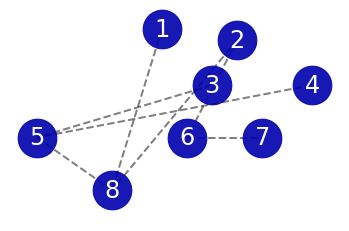

In [45]:
# Draw G with specific co-ordinates. 
pos= {'1': [-.2, .7], '2': [.1,  .4], '3': [0,-.8], '4': [0.4, -0.8], '5': [-.7, -2.2], '6': [-.1, -2.2], '7': [.2,-2.2], '8': [ -.4, -3.6]}
nx.draw_networkx_nodes(G_mst, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G_mst, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G_mst, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

#### iv. Compute the MST using Prim's algorithm. 

In [46]:
mst = list(tree.minimum_spanning_edges(G_mst, algorithm='prim', data=False))

In [47]:
mst

[('1', '8'),
 ('8', '2'),
 ('8', '5'),
 ('5', '3'),
 ('5', '4'),
 ('2', '6'),
 ('6', '7')]

#### v. Draw the MST graph after removing all edges not in the MST

In [48]:
G_mst = nx.Graph()

for node in ['1','2','3','4','5','6','7','8']:
    G_mst.add_node(node)


nodes_dict = {
    '1':[['8',120]],
    '2': [['6',180],['8',155]],
    '3': [['5',115]],
    '4': [['5',160]],
    '5': [['8',170]],
    '6': [['7',175]], 
}

for node in nodes_dict: 
    for edge in nodes_dict[node]:
        G_mst.add_edge(node, edge[0], weight = edge[1])

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


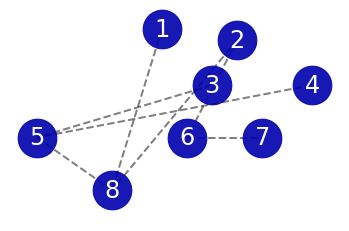

In [49]:
# Draw G with specific co-ordinates. 
pos= {'1': [-.2, .7], '2': [.1,  .4], '3': [0,-.8], '4': [0.4, -0.8], '5': [-.7, -2.2], '6': [-.1, -2.2], '7': [.2,-2.2], '8': [ -.4, -3.6]}
nx.draw_networkx_nodes(G_mst, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G_mst, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G_mst, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis